In [16]:
# Libraries

! pip install --user pycm

import os, cv2
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

from keras import backend as K
from keras.models import Model, Sequential
from keras.layers import Dropout, Flatten, Dense, Activation, Conv2D, MaxPooling2D
from keras.optimizers import Adam
from keras.utils import to_categorical

import os, cv2
from tqdm import tqdm

from pycm import *

You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.


In [17]:
X=[]
Z=[]

IMG_SIZE=256

ACCENT_ENGLISH_DIR='../input/accent-data/english/'
ACCENT_FRENCH_DIR='../input/accent-data/french/'
ACCENT_GERMAN_DIR='../input/accent-data/german/'
ACCENT_HINDI_DIR='../input/accent-data/hindi/'
ACCENT_ARABIC_DIR='../input/accent-data/arabic/'

In [18]:
def target(img, nationality):
    return nationality

In [19]:
def data_creation(nationality,DIR):
    for img in tqdm(os.listdir(DIR)):
        name = img
        label = target(img,nationality)
        path = os.path.join(DIR,img)
        img = cv2.imread(path,cv2.IMREAD_COLOR)
        img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
        
        X.append(np.array(img))
        Z.append([str(label),name])

In [20]:
# Creation of the data corresponding to the 5 accents

data_creation('english',ACCENT_ENGLISH_DIR)
data_creation('french',ACCENT_FRENCH_DIR)
data_creation('german',ACCENT_GERMAN_DIR)
data_creation('hindi',ACCENT_HINDI_DIR)
data_creation('arabic',ACCENT_ARABIC_DIR)

100%|██████████| 102/102 [00:00<00:00, 102.12it/s]


In [21]:
def equal_list(l1, l2):
    for i in range(len(l2)):
        if l1[i] != l2[i]:
            return False
    return True

In [22]:
# We transform the data in a way understandable by a Deep-Learning model

le = LabelEncoder()
L = []
for i in range(len(Z)):
    L.append(Z[i][0])
Y = le.fit_transform(L)
Y = to_categorical(Y,5)
l = []
for i in range(len(Y)):
    l.append([Y[i], Z[i][1]])
Y = l
X = np.array(X)
X = X/255

x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.25)

In [23]:
# We build y_train and y_test (with just the labels)

train_list = []
for l in y_train:
    train_list.append(l[0])

test_list = []
for l in y_test:
    test_list.append(l[0])

y_train = train_list
y_test = test_list

In [24]:
# We turn y_train and y_test into a single array, so we can use it in the model

for i in range(len(y_train)):
    y_train[i] = list(y_train[i])
y_train = np.asarray(y_train)

for i in range(len(y_test)):
    y_test[i] = list(y_test[i])
y_test = np.asarray(y_test)

y_test[:10]

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.]], dtype=float32)

# **Convolutional Neural Network**

In [25]:
# Convolutional Network
model = Sequential()
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',activation ='relu', input_shape = (256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(5, activation = "softmax"))

model.compile(optimizer=Adam(),loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 256, 256, 32)      2432      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 128, 128, 32)      0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 128, 128, 64)      18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 64, 64, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 262144)            0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               134218240 
_________________________________________________________________
activation_1 (Activation)    (None, 512)              

In [26]:
batch_size=50
epochs=500

history = model.fit(x_train,y_train,epochs=epochs,batch_size=batch_size,validation_data = (x_test,y_test))

Epoch 1/500
6/6 [==============================] - 1s 112ms/step - loss: 31.9047 - accuracy: 0.3309 - val_loss: 9.5602 - val_accuracy: 0.3804
Epoch 2/500
6/6 [==============================] - 1s 95ms/step - loss: 3.6182 - accuracy: 0.3309 - val_loss: 1.1404 - val_accuracy: 0.6848
Epoch 3/500
6/6 [==============================] - 1s 91ms/step - loss: 1.1315 - accuracy: 0.6764 - val_loss: 1.0118 - val_accuracy: 0.5543
Epoch 4/500
6/6 [==============================] - 1s 92ms/step - loss: 0.9768 - accuracy: 0.6218 - val_loss: 0.7931 - val_accuracy: 0.5870
Epoch 5/500
6/6 [==============================] - 1s 91ms/step - loss: 0.8365 - accuracy: 0.6545 - val_loss: 0.7243 - val_accuracy: 0.7065
Epoch 6/500
6/6 [==============================] - 1s 94ms/step - loss: 0.7082 - accuracy: 0.7055 - val_loss: 0.6998 - val_accuracy: 0.7609
Epoch 7/500
6/6 [==============================] - 1s 96ms/step - loss: 0.7006 - accuracy: 0.6836 - val_loss: 0.8410 - val_accuracy: 0.6957
Epoch 8/500
6/6 [=

Epoch 59/500
6/6 [==============================] - 1s 93ms/step - loss: 4.4513e-04 - accuracy: 1.0000 - val_loss: 1.5018 - val_accuracy: 0.7174
Epoch 60/500
6/6 [==============================] - 1s 92ms/step - loss: 4.2921e-04 - accuracy: 1.0000 - val_loss: 1.5657 - val_accuracy: 0.7283
Epoch 61/500
6/6 [==============================] - 1s 91ms/step - loss: 4.0437e-04 - accuracy: 1.0000 - val_loss: 1.5339 - val_accuracy: 0.7174
Epoch 62/500
6/6 [==============================] - 1s 93ms/step - loss: 3.7091e-04 - accuracy: 1.0000 - val_loss: 1.5751 - val_accuracy: 0.7283
Epoch 63/500
6/6 [==============================] - 1s 96ms/step - loss: 3.9471e-04 - accuracy: 1.0000 - val_loss: 1.5252 - val_accuracy: 0.7065
Epoch 64/500
6/6 [==============================] - 1s 105ms/step - loss: 3.8229e-04 - accuracy: 1.0000 - val_loss: 1.5641 - val_accuracy: 0.7174
Epoch 65/500
6/6 [==============================] - 1s 93ms/step - loss: 3.5762e-04 - accuracy: 1.0000 - val_loss: 1.5952 - val_a

6/6 [==============================] - 1s 95ms/step - loss: 2.7549e-05 - accuracy: 1.0000 - val_loss: 1.7545 - val_accuracy: 0.7500
Epoch 116/500
6/6 [==============================] - 1s 95ms/step - loss: 2.7088e-05 - accuracy: 1.0000 - val_loss: 1.8711 - val_accuracy: 0.7283
Epoch 117/500
6/6 [==============================] - 1s 92ms/step - loss: 2.5841e-05 - accuracy: 1.0000 - val_loss: 1.7839 - val_accuracy: 0.7500
Epoch 118/500
6/6 [==============================] - 1s 94ms/step - loss: 2.4131e-05 - accuracy: 1.0000 - val_loss: 1.8544 - val_accuracy: 0.7283
Epoch 119/500
6/6 [==============================] - 1s 96ms/step - loss: 2.4246e-05 - accuracy: 1.0000 - val_loss: 1.8790 - val_accuracy: 0.7283
Epoch 120/500
6/6 [==============================] - 1s 98ms/step - loss: 2.3777e-05 - accuracy: 1.0000 - val_loss: 1.7845 - val_accuracy: 0.7500
Epoch 121/500
6/6 [==============================] - 1s 101ms/step - loss: 2.2171e-05 - accuracy: 1.0000 - val_loss: 1.8084 - val_accuracy

6/6 [==============================] - 1s 91ms/step - loss: 2.8094e-06 - accuracy: 1.0000 - val_loss: 2.1593 - val_accuracy: 0.7283
Epoch 172/500
6/6 [==============================] - 1s 94ms/step - loss: 2.8376e-06 - accuracy: 1.0000 - val_loss: 2.0850 - val_accuracy: 0.7391
Epoch 173/500
6/6 [==============================] - 1s 96ms/step - loss: 2.7284e-06 - accuracy: 1.0000 - val_loss: 2.0598 - val_accuracy: 0.7500
Epoch 174/500
6/6 [==============================] - 1s 89ms/step - loss: 2.7128e-06 - accuracy: 1.0000 - val_loss: 2.2045 - val_accuracy: 0.7283
Epoch 175/500
6/6 [==============================] - 1s 94ms/step - loss: 2.6226e-06 - accuracy: 1.0000 - val_loss: 2.0660 - val_accuracy: 0.7500
Epoch 176/500
6/6 [==============================] - 1s 93ms/step - loss: 2.4353e-06 - accuracy: 1.0000 - val_loss: 2.1344 - val_accuracy: 0.7283
Epoch 177/500
6/6 [==============================] - 1s 97ms/step - loss: 2.1999e-06 - accuracy: 1.0000 - val_loss: 2.1328 - val_accuracy:

6/6 [==============================] - 1s 94ms/step - loss: 7.0528e-07 - accuracy: 1.0000 - val_loss: 2.3277 - val_accuracy: 0.7283
Epoch 228/500
6/6 [==============================] - 1s 94ms/step - loss: 6.8448e-07 - accuracy: 1.0000 - val_loss: 2.2722 - val_accuracy: 0.7391
Epoch 229/500
6/6 [==============================] - 1s 91ms/step - loss: 6.7798e-07 - accuracy: 1.0000 - val_loss: 2.3101 - val_accuracy: 0.7283
Epoch 230/500
6/6 [==============================] - 1s 92ms/step - loss: 6.5630e-07 - accuracy: 1.0000 - val_loss: 2.3181 - val_accuracy: 0.7283
Epoch 231/500
6/6 [==============================] - 1s 110ms/step - loss: 6.8361e-07 - accuracy: 1.0000 - val_loss: 2.2932 - val_accuracy: 0.7391
Epoch 232/500
6/6 [==============================] - 1s 94ms/step - loss: 7.0268e-07 - accuracy: 1.0000 - val_loss: 2.2959 - val_accuracy: 0.7283
Epoch 233/500
6/6 [==============================] - 1s 102ms/step - loss: 6.8751e-07 - accuracy: 1.0000 - val_loss: 2.4047 - val_accurac

6/6 [==============================] - 1s 94ms/step - loss: 2.8914e-07 - accuracy: 1.0000 - val_loss: 2.4295 - val_accuracy: 0.7174
Epoch 284/500
6/6 [==============================] - 1s 93ms/step - loss: 2.9867e-07 - accuracy: 1.0000 - val_loss: 2.4198 - val_accuracy: 0.7283
Epoch 285/500
6/6 [==============================] - 1s 92ms/step - loss: 2.8090e-07 - accuracy: 1.0000 - val_loss: 2.4149 - val_accuracy: 0.7283
Epoch 286/500
6/6 [==============================] - 1s 94ms/step - loss: 2.6963e-07 - accuracy: 1.0000 - val_loss: 2.4392 - val_accuracy: 0.7283
Epoch 287/500
6/6 [==============================] - 1s 94ms/step - loss: 2.6356e-07 - accuracy: 1.0000 - val_loss: 2.3754 - val_accuracy: 0.7391
Epoch 288/500
6/6 [==============================] - 1s 94ms/step - loss: 2.6790e-07 - accuracy: 1.0000 - val_loss: 2.4786 - val_accuracy: 0.7283
Epoch 289/500
6/6 [==============================] - 1s 96ms/step - loss: 2.7787e-07 - accuracy: 1.0000 - val_loss: 2.3949 - val_accuracy:

6/6 [==============================] - 1s 94ms/step - loss: 1.5042e-07 - accuracy: 1.0000 - val_loss: 2.4463 - val_accuracy: 0.7391
Epoch 340/500
6/6 [==============================] - 1s 97ms/step - loss: 1.4652e-07 - accuracy: 1.0000 - val_loss: 2.5631 - val_accuracy: 0.7283
Epoch 341/500
6/6 [==============================] - 1s 95ms/step - loss: 1.4045e-07 - accuracy: 1.0000 - val_loss: 2.4948 - val_accuracy: 0.7283
Epoch 342/500
6/6 [==============================] - 1s 94ms/step - loss: 1.4045e-07 - accuracy: 1.0000 - val_loss: 2.4720 - val_accuracy: 0.7391
Epoch 343/500
6/6 [==============================] - 1s 93ms/step - loss: 1.3742e-07 - accuracy: 1.0000 - val_loss: 2.5403 - val_accuracy: 0.7174
Epoch 344/500
6/6 [==============================] - 1s 92ms/step - loss: 1.4435e-07 - accuracy: 1.0000 - val_loss: 2.5576 - val_accuracy: 0.7283
Epoch 345/500
6/6 [==============================] - 1s 110ms/step - loss: 1.4218e-07 - accuracy: 1.0000 - val_loss: 2.4968 - val_accuracy

6/6 [==============================] - 1s 92ms/step - loss: 8.1496e-08 - accuracy: 1.0000 - val_loss: 2.6557 - val_accuracy: 0.7283
Epoch 396/500
6/6 [==============================] - 1s 102ms/step - loss: 8.1929e-08 - accuracy: 1.0000 - val_loss: 2.4999 - val_accuracy: 0.7391
Epoch 397/500
6/6 [==============================] - 1s 99ms/step - loss: 7.8895e-08 - accuracy: 1.0000 - val_loss: 2.5691 - val_accuracy: 0.7500
Epoch 398/500
6/6 [==============================] - 1s 93ms/step - loss: 7.2393e-08 - accuracy: 1.0000 - val_loss: 2.6350 - val_accuracy: 0.7391
Epoch 399/500
6/6 [==============================] - 1s 92ms/step - loss: 6.5457e-08 - accuracy: 1.0000 - val_loss: 2.5526 - val_accuracy: 0.7500
Epoch 400/500
6/6 [==============================] - 1s 94ms/step - loss: 7.1092e-08 - accuracy: 1.0000 - val_loss: 2.6198 - val_accuracy: 0.7391
Epoch 401/500
6/6 [==============================] - 1s 90ms/step - loss: 6.5023e-08 - accuracy: 1.0000 - val_loss: 2.5865 - val_accuracy

6/6 [==============================] - 1s 92ms/step - loss: 1.4749 - accuracy: 0.4800 - val_loss: 1.3095 - val_accuracy: 0.3696
Epoch 452/500
6/6 [==============================] - 1s 93ms/step - loss: 1.2340 - accuracy: 0.6218 - val_loss: 1.0498 - val_accuracy: 0.7065
Epoch 453/500
6/6 [==============================] - 1s 90ms/step - loss: 1.0964 - accuracy: 0.6473 - val_loss: 1.3317 - val_accuracy: 0.5435
Epoch 454/500
6/6 [==============================] - 1s 90ms/step - loss: 1.1403 - accuracy: 0.6145 - val_loss: 1.0843 - val_accuracy: 0.7065
Epoch 455/500
6/6 [==============================] - 1s 107ms/step - loss: 1.2745 - accuracy: 0.6764 - val_loss: 1.5763 - val_accuracy: 0.3696
Epoch 456/500
6/6 [==============================] - 1s 97ms/step - loss: 1.5123 - accuracy: 0.4182 - val_loss: 1.5717 - val_accuracy: 0.3696
Epoch 457/500
6/6 [==============================] - 1s 93ms/step - loss: 1.4722 - accuracy: 0.4182 - val_loss: 1.4767 - val_accuracy: 0.3696
Epoch 458/500
6/6 [

In [27]:
x_new = x_test
y_pred = model.predict_classes(x_new)
y_pred[:10]

array([0, 0, 0, 0, 0, 1, 1, 1, 4, 1])

In [28]:
y_true = y_test.tolist()

for i in range(len(y_true)):
    if equal_list(y_true[i], [1., 0., 0., 0., 0.]):
        y_true[i] = 0
    elif equal_list(y_true[i], [0., 1., 0., 0., 0.]):
        y_true[i] = 1
    elif equal_list(y_true[i], [0., 0., 1., 0., 0.]):
        y_true[i] = 2
    elif equal_list(y_true[i], [0., 0., 0., 1., 0.]):
        y_true[i] = 3
    elif equal_list(y_true[i], [0., 0., 0., 0., 1.]):
        y_true[i] = 4
        
len(y_true)

92

In [29]:
cm = ConfusionMatrix(actual_vector=y_true, predict_vector=y_pred)
cm.relabel(mapping={0:"arabic", 1:"english", 2:"french", 3:"german", 4:"hindi"})
print(cm)

Predict       arabic        english       french        german        hindi         
Actual
arabic        31            0             0             0             0             

english       0             31            1             1             1             

french        0             9             3             4             3             

german        0             5             1             0             0             

hindi         0             1             0             1             0             





Overall Statistics : 

95% CI                                                            (0.61347,0.79957)
ACC Macro                                                         0.88261
ARI                                                               0.58636
AUNP                                                              0.79989
AUNU                                                              0.66694
Bangdiwala B                                                      0.724

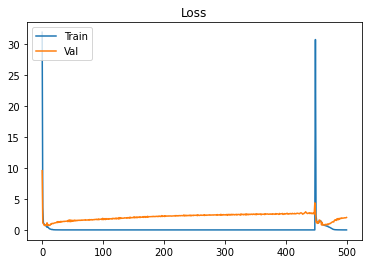

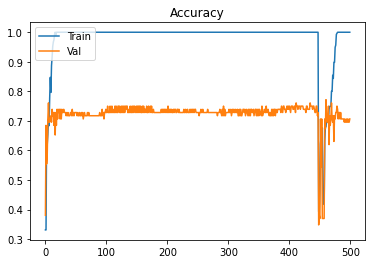

In [30]:
loss_curve = history.history["loss"]
acc_curve = history.history["accuracy"]

acc_val_curve = history.history["val_accuracy"]
loss_val_curve = history.history["val_loss"]

plt.plot(loss_curve, label="Train")
plt.plot(loss_val_curve, label="Val")
plt.legend(loc='upper left')
plt.title("Loss")
plt.show()

plt.plot(acc_curve, label="Train")
plt.plot(acc_val_curve, label="Val")
plt.legend(loc='upper left')
plt.title("Accuracy")
plt.show()